In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [2]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "../dataset/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

train_dataset.class_names

Found 6500 files belonging to 4 classes.


['Damaged', 'Old', 'Ripe', 'Unripe']

In [3]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    "../dataset/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)

val_dataset.class_names

Found 724 files belonging to 4 classes.


['Damaged', 'Old', 'Ripe', 'Unripe']

(224, 224, 3)


2025-11-16 21:21:21.930142: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


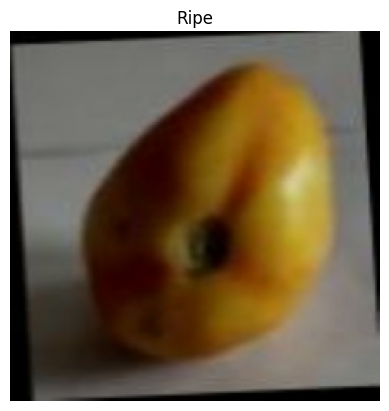

In [4]:
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    print(images[0].shape)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(class_names[labels[0].numpy().argmax()])
    plt.axis("off")

In [5]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

test data_augmentation layer...
(224, 224, 3)


2025-11-16 21:21:22.053881: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


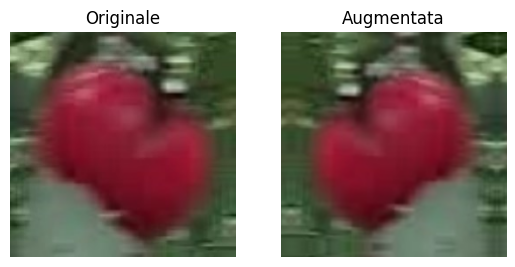

In [6]:
print("test data_augmentation layer...")
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    print(images[0].shape)
    plt.subplot(1, 2, 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title("Originale")
    plt.axis("off")

    
    aug_img = data_augmentation(tf.expand_dims(images[0], 0))  # <- aggiunge batch
    plt.subplot(1, 2, 2)
    plt.imshow(tf.squeeze(aug_img).numpy().astype("uint8"))  # <- rimuove batch per plt
    plt.title("Augmentata")
    plt.axis("off")

In [7]:
model = tf.keras.Sequential([
    data_augmentation,

    tf.keras.layers.Conv2D(16, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(4)
])

In [8]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (1, 224, 224, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (1, 224, 224, 16)      │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (1, 224, 224, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (1, 224, 224, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (1, 112, 112, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (1, 112, 112, 32)      │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (1, 112, 112, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (1, 112, 112, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (1, 56, 56, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 56, 56, 64)        │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (1, 56, 56, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (1, 56, 56, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 28, 28, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 28, 28, 128)       │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (1, 28, 28, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (1, 28, 28, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (1, 14, 14, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (1, 128)               │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 128)               │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 128)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 128)               │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 4)                 │           516 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 131,700 (514.45 KB)

 Trainable params: 131,220 (512.58 KB)

 Non-trainable params: 480 (1.88 KB)

In [11]:
import mlflow
import mlflow.tensorflow

epochs=50 
mlflow.set_tracking_uri("sqlite:///mlflow.db")

with mlflow.start_run():
        mlflow.tensorflow.autolog()    
        
        history = model.fit(train_dataset, 
                            validation_data=val_dataset, 
                            epochs=epochs, 
                            callbacks=[callback])

2025/11/16 21:21:22 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/11/16 21:21:22 INFO mlflow.store.db.utils: Updating database tables
2025-11-16 21:21:22 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-16 21:21:22 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-11-16 21:21:23 INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
2025-11-16 21:21:23 INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025-11-16 21:21:23 INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025-11-16 21:21:23 INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025-11-16 21:21:23 INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025-11-16 21:21:23 INFO  [alembic.runtime.mig

Epoch 1/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.3365 - loss: 1.3478

2025-11-16 21:22:25 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 61s 292ms/step - accuracy: 0.4497 - loss: 1.2144 - val_accuracy: 0.5994 - val_loss: 1.1179
Epoch 2/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.6425 - loss: 0.9446

2025-11-16 21:23:28 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 63s 311ms/step - accuracy: 0.6635 - loss: 0.8972 - val_accuracy: 0.7459 - val_loss: 0.7794
Epoch 3/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.7180 - loss: 0.7724

2025-11-16 21:24:30 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 61s 301ms/step - accuracy: 0.7228 - loss: 0.7567 - val_accuracy: 0.7928 - val_loss: 0.6347
Epoch 4/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.7534 - loss: 0.6885

2025-11-16 21:25:31 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 61s 300ms/step - accuracy: 0.7517 - loss: 0.6781 - val_accuracy: 0.7790 - val_loss: 0.5757
Epoch 5/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.7604 - loss: 0.6151

2025-11-16 21:26:36 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 65s 316ms/step - accuracy: 0.7626 - loss: 0.6150 - val_accuracy: 0.8191 - val_loss: 0.5203
Epoch 6/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.7757 - loss: 0.5759

2025-11-16 21:27:42 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 67s 328ms/step - accuracy: 0.7758 - loss: 0.5715 - val_accuracy: 0.8163 - val_loss: 0.4919
Epoch 7/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.7992 - loss: 0.5518

2025-11-16 21:28:43 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 60s 294ms/step - accuracy: 0.7918 - loss: 0.5521 - val_accuracy: 0.8232 - val_loss: 0.4669
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8027 - loss: 0.5218

2025-11-16 21:29:41 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 287ms/step - accuracy: 0.7998 - loss: 0.5247 - val_accuracy: 0.8467 - val_loss: 0.4473
Epoch 9/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.8102 - loss: 0.5113

2025-11-16 21:30:41 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 291ms/step - accuracy: 0.8122 - loss: 0.5027 - val_accuracy: 0.8577 - val_loss: 0.4237
Epoch 10/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8129 - loss: 0.4948

2025-11-16 21:31:38 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 282ms/step - accuracy: 0.8098 - loss: 0.4933 - val_accuracy: 0.8591 - val_loss: 0.4158
Epoch 11/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8271 - loss: 0.4739

2025-11-16 21:32:37 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 286ms/step - accuracy: 0.8175 - loss: 0.4815 - val_accuracy: 0.8550 - val_loss: 0.4044
Epoch 12/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8250 - loss: 0.4654

2025-11-16 21:33:34 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 282ms/step - accuracy: 0.8238 - loss: 0.4623 - val_accuracy: 0.8550 - val_loss: 0.4023
Epoch 13/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.8299 - loss: 0.4555

2025-11-16 21:34:35 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 61s 298ms/step - accuracy: 0.8298 - loss: 0.4515 - val_accuracy: 0.8688 - val_loss: 0.3781
Epoch 14/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.8297 - loss: 0.4473

2025-11-16 21:35:34 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 60s 292ms/step - accuracy: 0.8320 - loss: 0.4395 - val_accuracy: 0.8646 - val_loss: 0.3758
Epoch 15/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.8361 - loss: 0.4377

2025-11-16 21:36:34 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 290ms/step - accuracy: 0.8317 - loss: 0.4374 - val_accuracy: 0.8674 - val_loss: 0.3604
Epoch 16/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8374 - loss: 0.4282

2025-11-16 21:37:32 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 288ms/step - accuracy: 0.8371 - loss: 0.4231 - val_accuracy: 0.8646 - val_loss: 0.3602
Epoch 17/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.8383 - loss: 0.4130

2025-11-16 21:38:32 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 60s 294ms/step - accuracy: 0.8398 - loss: 0.4097 - val_accuracy: 0.8702 - val_loss: 0.3574
Epoch 18/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8466 - loss: 0.4071

2025-11-16 21:39:31 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 286ms/step - accuracy: 0.8415 - loss: 0.4142 - val_accuracy: 0.8729 - val_loss: 0.3427
Epoch 19/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8528 - loss: 0.4024

2025-11-16 21:40:29 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 284ms/step - accuracy: 0.8480 - loss: 0.4057 - val_accuracy: 0.8785 - val_loss: 0.3384
Epoch 20/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.8552 - loss: 0.3903

2025-11-16 21:41:28 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 290ms/step - accuracy: 0.8554 - loss: 0.3862 - val_accuracy: 0.8757 - val_loss: 0.3363
Epoch 21/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8545 - loss: 0.3853

2025-11-16 21:42:27 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 288ms/step - accuracy: 0.8517 - loss: 0.3874 - val_accuracy: 0.8771 - val_loss: 0.3313
Epoch 22/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8474 - loss: 0.3930

2025-11-16 21:43:26 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 287ms/step - accuracy: 0.8514 - loss: 0.3852 - val_accuracy: 0.8757 - val_loss: 0.3281
Epoch 23/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.8576 - loss: 0.3780

2025-11-16 21:44:25 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 291ms/step - accuracy: 0.8542 - loss: 0.3824 - val_accuracy: 0.8729 - val_loss: 0.3239
Epoch 24/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.8625 - loss: 0.3718

2025-11-16 21:45:24 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 290ms/step - accuracy: 0.8603 - loss: 0.3754 - val_accuracy: 0.8757 - val_loss: 0.3185
Epoch 25/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 60s 292ms/step - accuracy: 0.8563 - loss: 0.3672 - val_accuracy: 0.8785 - val_loss: 0.3191
Epoch 26/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 66s 321ms/step - accuracy: 0.8622 - loss: 0.3600 - val_accuracy: 0.8729 - val_loss: 0.3196
Epoch 27/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.8638 - loss: 0.3637

2025-11-16 21:48:32 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 62s 305ms/step - accuracy: 0.8623 - loss: 0.3624 - val_accuracy: 0.8785 - val_loss: 0.3132
Epoch 28/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8554 - loss: 0.3747

2025-11-16 21:49:29 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 283ms/step - accuracy: 0.8569 - loss: 0.3667 - val_accuracy: 0.8826 - val_loss: 0.3093
Epoch 29/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.8679 - loss: 0.3562

2025-11-16 21:50:29 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 60s 292ms/step - accuracy: 0.8671 - loss: 0.3538 - val_accuracy: 0.8826 - val_loss: 0.3036
Epoch 30/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 284ms/step - accuracy: 0.8668 - loss: 0.3524 - val_accuracy: 0.8812 - val_loss: 0.3051
Epoch 31/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.8776 - loss: 0.3428

2025-11-16 21:52:26 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 289ms/step - accuracy: 0.8688 - loss: 0.3515 - val_accuracy: 0.8812 - val_loss: 0.3029
Epoch 32/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.8684 - loss: 0.3463

2025-11-16 21:53:25 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 291ms/step - accuracy: 0.8646 - loss: 0.3516 - val_accuracy: 0.8881 - val_loss: 0.2957
Epoch 33/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 286ms/step - accuracy: 0.8702 - loss: 0.3396 - val_accuracy: 0.8798 - val_loss: 0.3013
Epoch 34/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8716 - loss: 0.3388

2025-11-16 21:55:22 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 283ms/step - accuracy: 0.8711 - loss: 0.3399 - val_accuracy: 0.8881 - val_loss: 0.2926
Epoch 35/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8757 - loss: 0.3392

2025-11-16 21:56:22 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 60s 294ms/step - accuracy: 0.8774 - loss: 0.3359 - val_accuracy: 0.8840 - val_loss: 0.2880
Epoch 36/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.8793 - loss: 0.3231

2025-11-16 21:57:22 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 60s 296ms/step - accuracy: 0.8789 - loss: 0.3278 - val_accuracy: 0.8785 - val_loss: 0.2878
Epoch 37/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 287ms/step - accuracy: 0.8740 - loss: 0.3278 - val_accuracy: 0.8771 - val_loss: 0.2880
Epoch 38/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8837 - loss: 0.3140

2025-11-16 21:59:18 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 57s 281ms/step - accuracy: 0.8794 - loss: 0.3167 - val_accuracy: 0.8867 - val_loss: 0.2865
Epoch 39/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 288ms/step - accuracy: 0.8748 - loss: 0.3253 - val_accuracy: 0.8785 - val_loss: 0.2976
Epoch 40/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.8827 - loss: 0.3098

2025-11-16 22:01:17 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 60s 296ms/step - accuracy: 0.8785 - loss: 0.3139 - val_accuracy: 0.8854 - val_loss: 0.2813
Epoch 41/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.8831 - loss: 0.3117

2025-11-16 22:02:18 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 61s 297ms/step - accuracy: 0.8805 - loss: 0.3176 - val_accuracy: 0.8923 - val_loss: 0.2737
Epoch 42/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 61s 298ms/step - accuracy: 0.8774 - loss: 0.3193 - val_accuracy: 0.8826 - val_loss: 0.2784
Epoch 43/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.8803 - loss: 0.3177

2025-11-16 22:04:20 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 62s 302ms/step - accuracy: 0.8818 - loss: 0.3142 - val_accuracy: 0.8854 - val_loss: 0.2721
Epoch 44/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8841 - loss: 0.3130

2025-11-16 22:05:27 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 67s 328ms/step - accuracy: 0.8818 - loss: 0.3121 - val_accuracy: 0.8854 - val_loss: 0.2712
Epoch 45/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 61s 297ms/step - accuracy: 0.8866 - loss: 0.3027 - val_accuracy: 0.8867 - val_loss: 0.2724
Epoch 46/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 288ms/step - accuracy: 0.8868 - loss: 0.3009 - val_accuracy: 0.8854 - val_loss: 0.2728
Epoch 47/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 286ms/step - accuracy: 0.8823 - loss: 0.3086 - val_accuracy: 0.8867 - val_loss: 0.2759
Epoch 48/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 61s 297ms/step - accuracy: 0.8874 - loss: 0.2970 - val_accuracy: 0.8881 - val_loss: 0.2731
Epoch 49/50
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8857 - loss: 0.3044

2025-11-16 22:10:26 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


204/204 ━━━━━━━━━━━━━━━━━━━━ 61s 297ms/step - accuracy: 0.8849 - loss: 0.3039 - val_accuracy: 0.8881 - val_loss: 0.2646
Epoch 50/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 288ms/step - accuracy: 0.8889 - loss: 0.2950 - val_accuracy: 0.8881 - val_loss: 0.2692
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


2025/11/16 22:11:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/16 22:11:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: (raised as a result of Query-invoked autoflush; consider using a session.no_autoflush block if this flush is occurring prematurely)
(sqlite3.IntegrityError) UNIQUE constraint failed: metrics.key, metrics.timestamp, metrics.step, metrics.run_uuid, metrics.value, metrics.is_nan
[SQL: INSERT INTO metrics ("key", value, timestamp, step, is_nan, run_uuid) VALUES (?, ?, ?, ?, ?, ?)]
[parameters: [('accuracy', 0.4496923089027405, 1763324545480, 0, 0, 'f6fe36674c0546aaa71cb319acc11868'), ('loss', 1.2143610715866089, 1763324545480, 0, 0, 'f6fe36674c0546aaa71cb319acc11868'), ('val_accuracy', 0.59944748878479, 1763324545480, 0, 0, 'f6fe36674c0546aaa71cb319acc11868'), ('val_loss', 1.1178562641143799, 1763324545480, 0, 0, 'f6fe36674c0546aaa71cb319acc11868')]]
(Background on t

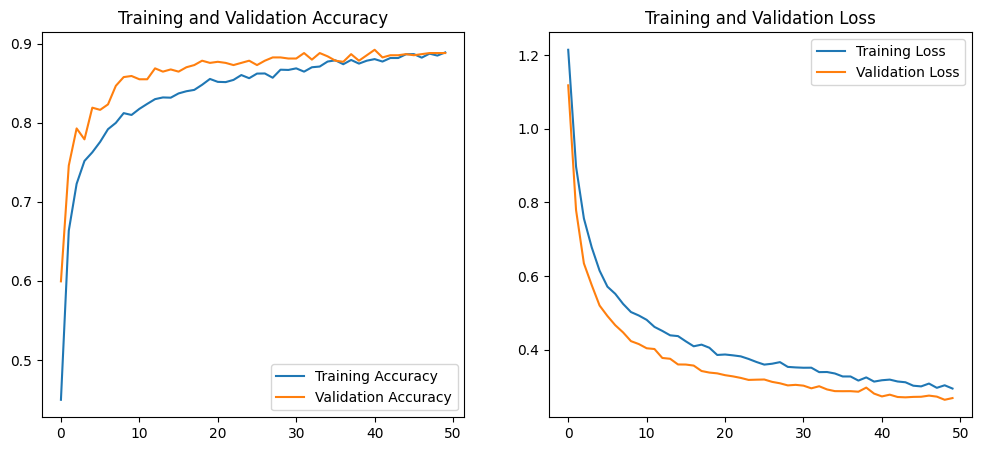

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [13]:

model.class_names = class_names
model.save(filepath=f"../models/small_CNN.keras")

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (1, 224, 224, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (1, 224, 224, 16)      │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (1, 224, 224, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (1, 224, 224, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (1, 112, 112, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (1, 112, 112, 32)      │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (1, 112, 112, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (1, 112, 112, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (1, 56, 56, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 56, 56, 64)        │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (1, 56, 56, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (1, 56, 56, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 28, 28, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 28, 28, 128)       │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (1, 28, 28, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (1, 28, 28, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (1, 14, 14, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (1, 128)               │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 128)               │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 128)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 128)               │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 4)                 │           516 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 394,142 (1.50 MB)

 Trainable params: 131,220 (512.58 KB)

 Non-trainable params: 480 (1.88 KB)

 Optimizer params: 262,442 (1.00 MB)